In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
evolution_log = pd.read_csv("evolution_log.csv")
# event_history = pd.read_csv("event_history.csv").sort_values(by="event")
price_matrix = pd.read_csv("price_matrix.csv")
pso_log = pd.read_csv("pso_log.csv")
random_search_log = pd.read_csv("random_search_log.csv")
mab_log = pd.read_csv("mab_log.csv")
mab_arms = pd.read_csv("mab_arms.csv")

In [17]:
mab_reward_dist = mab_log.groupby('run_id').agg(
    reward_per_run=('reward', 'sum'),
)

In [18]:
fitness_dist_es = evolution_log.drop_duplicates(subset=["individual"])

Text(0, 0.5, 'Objective Value')

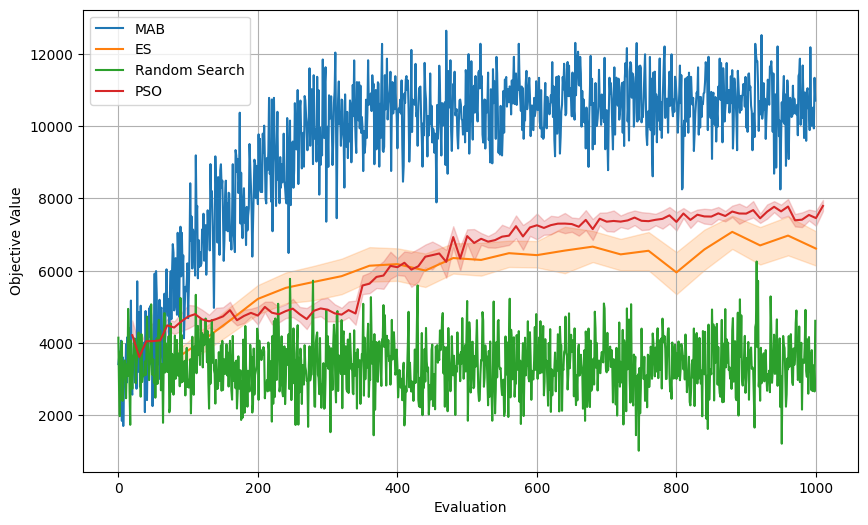

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(
    data=mab_reward_dist,
    x="run_id",
    y="reward_per_run",
    label="MAB",
    ax=ax,
)

sns.lineplot(
    data=fitness_dist_es,
#     .groupby("n_evals").agg(
#     max_fitness=('score', 'max'),
# ),
    x="n_evals",
    y="score",
    label="ES",
    ax=ax,
)
sns.lineplot(
    data=random_search_log,
    x="evaluation",
    y="fitness",
    label="Random Search",
    ax=ax,
)
sns.lineplot(
    data=pso_log,
#     .groupby("num_evals").agg(
#     max_fitness=('current_fitness', 'max'),
# ),
    x="num_evals",
    y="current_fitness",
    label="PSO",
    ax=ax,
)
ax.grid()
ax.set_xlabel("Evaluation")
ax.set_ylabel("Objective Value")

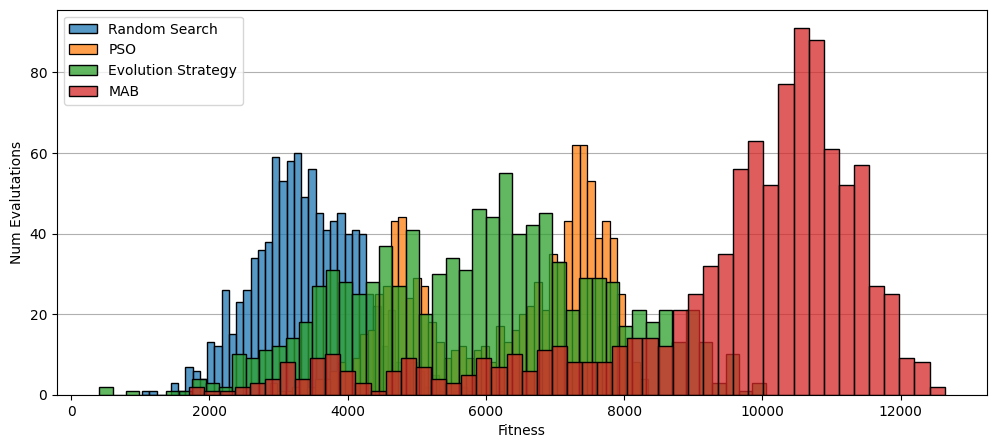

In [20]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=random_search_log.fitness, ax=ax, bins=50)
sns.histplot(data=pso_log.current_fitness, ax=ax, bins=50)
sns.histplot(data=fitness_dist_es.score, ax=ax, bins=50)
sns.histplot(data=mab_reward_dist.reward_per_run, ax=ax, bins=50)

ax.grid(axis="y")
ax.set_axisbelow(True)

ax.set_xlabel("Fitness")
ax.set_ylabel("Num Evalutations")
ax.legend(["Random Search", "PSO", "Evolution Strategy", "MAB"])